# Koordinatni sustavi
U ovom ćemo poglavlju opisati koordinatne sustave.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
class plots:
    def __init__(self, z=None, H=None, delta=None, phi=None, alpha=0.):
        self.f, self.ax = plt.subplots(1, 1)
        self.ax.grid(True)
        self.z = z
        self.H = H
        self.delta = delta
        self.phi = phi
        self.alpha = alpha
    def cos(self, x):
        return np.cos(np.pi*x/180.)
    def sin(self, x):
        return np.sin(np.pi*x/180.)
    def arccos(self, x):
        return np.arccos(x)*180./np.pi
    def zH(self, xlabel ='H [h]', *args, **kwargs):
        self.ax.set_xlabel(xlabel)
        self.ax.set_ylabel('z [deg]')
        self.ax2 = self.ax.twinx()
        self.ax2.set_ylim(-90, 90)
        self.ax2.set_ylabel('h [deg]')
        self.ax.set_xlim(0, 24)
        self.ax.set_ylim(0, 180)
        self.z =self.arccos(
            self.cos(90.-self.phi)*self.cos(90.-self.delta)+
            self.sin(90.-self.phi)*self.sin(90.-self.delta)*self.cos(15.*self.H))
        self.ax.plot(self.H+self.alpha, self.z, *args, **kwargs)

/Users/kresimirtisanic/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


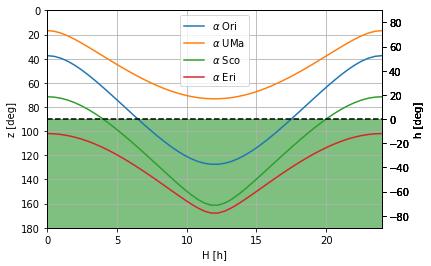

In [2]:
%matplotlib inline
p=plots()
p.alpha = 0.
p.phi = 45.
p.delta = 7.5
p.H = np.linspace(0, 24)
p.zH(label = r'$\alpha$ Ori')
p.delta = 61.75
p.zH(label = r'$\alpha$ UMa')
p.delta = -26.5
p.zH(label = r'$\alpha$ Sco')
p.delta = -57
p.zH(label = r'$\alpha$ Eri')
p.ax.legend()
p.ax.axhline(90, color='k', ls='dashed')
p.ax.fill_between(p.H, 90, 180, color='g', alpha=0.5)
p.ax.invert_yaxis()
p.f.show()

/Users/kresimirtisanic/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


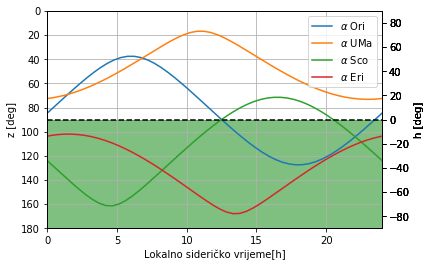

In [3]:
%matplotlib inline
p=plots()
p.phi = 45.
p.H = np.linspace(-48, 48, 200)

p.delta = 7.5
p.alpha = 6.
p.zH(label = r'$\alpha$ Ori')
p.alpha = 11
p.delta = 61.75
p.zH(label = r'$\alpha$ UMa')
p.alpha = 16.5
p.delta = -26.5
p.zH(label = r'$\alpha$ Sco')
p.alpha = 1.5
p.delta = -57.
p.zH(xlabel = 'Lokalno sideričko vrijeme[h]', label = r'$\alpha$ Eri')
p.ax.legend()
p.ax.axhline(90, color='k', ls='dashed')
p.ax.fill_between(p.H, 90, 180, color='g', alpha=0.5)
p.ax.invert_yaxis()
p.f.show()

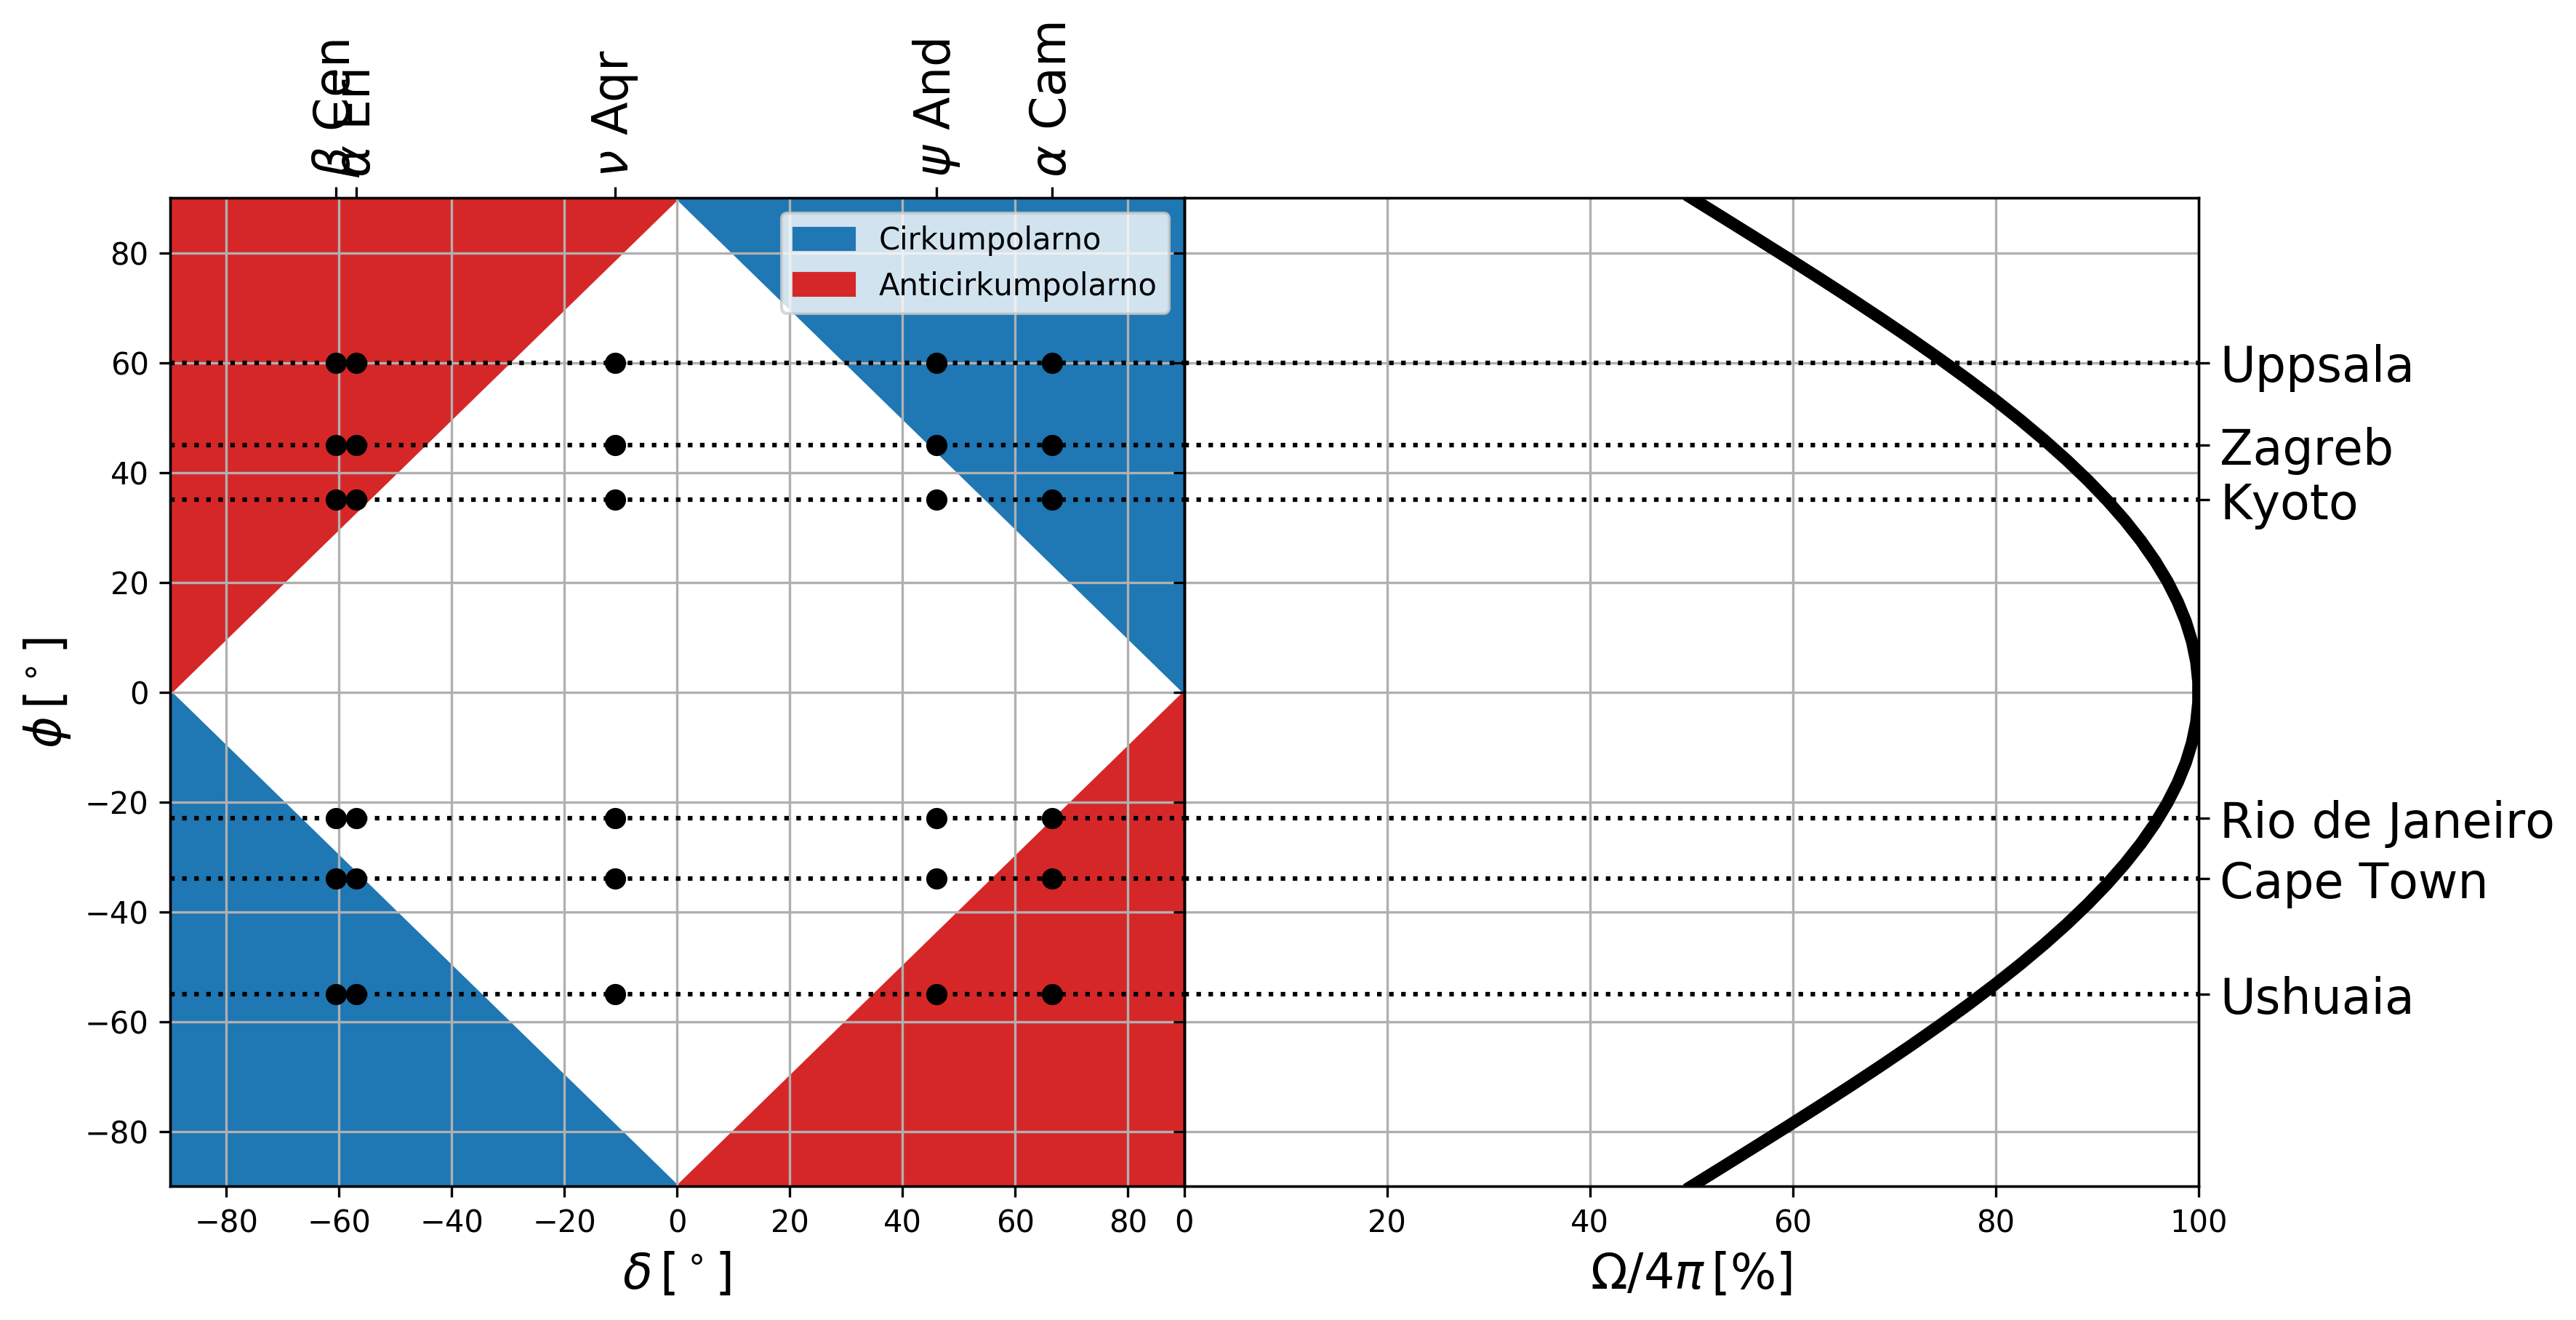

In [4]:
f, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True, dpi=300)
ax = axs[0]
delta = np.linspace(-90, 90, 200)
deltap = delta[delta>0]
deltam = delta[delta<0]
ax.fill_between(deltap, 90-deltap, 90, color='C0',label = 'Cirkumpolarno')
ax.fill_between(deltam, 90-np.abs(deltam), 90, color='C3',label = 'Anticirkumpolarno')

ax.fill_between(deltap, -(90-deltap), -90, color='C3')
ax.fill_between(deltam, -(90-np.abs(deltam)), -90,color='C0')
ax.legend()
ax.grid(True)
ax.set_xlim(-90, 90)
ax.set_ylim(-90, 90)
ax.set_xlabel(r'$\delta\,\mathrm{[^\circ]}$', size=16)
ax.set_ylabel(r'$\phi\,\mathrm{[^\circ]}$', size=16)
phis = [45, -23, 35, -34, 60, -55]
grad = ['Zagreb', 'Rio de Janeiro', 'Kyoto', 'Cape Town', 'Uppsala', 'Ushuaia']
stars = [-11, 46, 66.5, -57, -60.5]
names = [r'$\nu$ Aqr', r'$\psi$ And', r'$\alpha$ Cam', r'$\alpha$ Eri', r'$\beta$ Cen']
for phi in phis:
    ax.axhline(phi, ls='dotted', color='k')
for star in stars:
        ax.plot(6*[star], phis, 'ko')
ax0 = ax.twiny()
ax0.set_xlim(-90, 90)
ax0.set_xticks(stars)
ax0.set_xticklabels(names,rotation=90, size=16)
ax = axs[1]
phi = np.linspace(-90, 90)
ax.plot( 100*np.cos(np.abs(phi)*np.pi/2/180)**2, phi, lw=4, color='k')
ax.grid()
ax.set_ylim(-90, 90)
ax.set_xlim(0, 100)
ax.set_xlabel(r'$\Omega/4\pi\,\mathrm{[\%]}$', size=16)
ax0 = ax.twinx()
ax0.set_ylim(-90, 90)
ax0.set_yticks(phis)
ax0.set_yticklabels(grad, minor=False, rotation=0, size=16)
for phi in phis:
    ax0.axhline(phi, ls='dotted', color='k')
f.subplots_adjust(wspace=0.0)